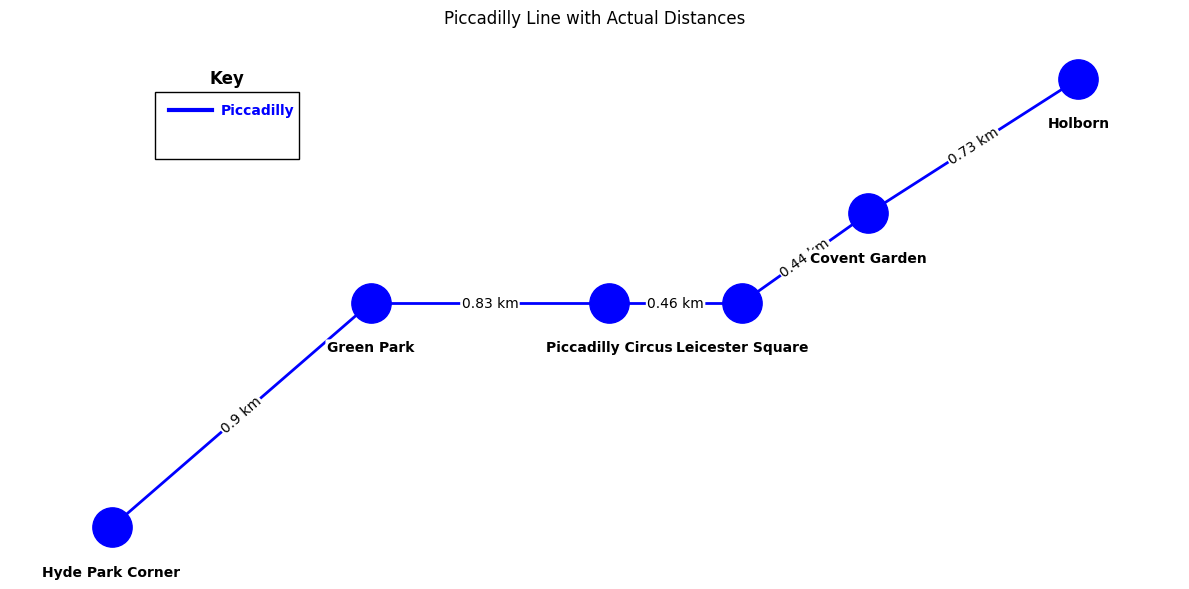

In [19]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import requests

# API key for accessing the GraphHopper routing service
api_key = 'fece4b86-5149-4996-8c82-f6e7e97db767'

# Function to get the distance between two places using the GraphHopper API
def get_distance(from_place, to_place, api_key):
    # Construct the API request URL
    url = f"https://graphhopper.com/api/1/route?point={from_place}&point={to_place}&vehicle=foot&locale=en&key={api_key}"
    try:
        # Send the GET request to the API
        response = requests.get(url)
        # Raise an exception if the request was unsuccessful
        response.raise_for_status()
        # Parse the JSON response
        data = response.json()
        # Check if the response contains path data
        if 'paths' in data and len(data['paths']) > 0:
            # Extract the distance from the response and convert it to kilometers
            distance = data['paths'][0]['distance'] / 1000
            return round(distance, 2)
    except requests.exceptions.RequestException as e:
        # Print an error message if the request failed
        print(f"Request error: {e}")
    except KeyError:
        # Print an error message if the response format was unexpected
        print(f"Unexpected API response format: {response.json()}")
    return None

# Dictionary of station names and their coordinates (latitude, longitude)
stations = {
    'Hyde Park Corner': (51.50302149128801, -0.15235824006243975),
    'Green Park': (51.5070061280002, -0.14287307418199865),
    'Piccadilly Circus': (51.510121269538445, -0.1341883950738745),
    'Leicester Square': (51.51145856943495, -0.1281549563384886),
    'Covent Garden': (51.5129893884849, -0.12416984745824243),
    'Holborn': (51.517400079753095, -0.12008183592996242)
}

# List of connections between stations
connections = [
    ('Hyde Park Corner', 'Green Park'),
    ('Green Park', 'Piccadilly Circus'),
    ('Piccadilly Circus', 'Leicester Square'),
    ('Leicester Square', 'Covent Garden'),
    ('Covent Garden', 'Holborn')
]

# Dictionary to store distances between connected stations
distances = {}
for u, v in connections:
    # Get the distance between each pair of connected stations
    distance = get_distance(f"{stations[u][0]},{stations[u][1]}", f"{stations[v][0]},{stations[v][1]}", api_key)
    if distance is not None:
        # Store the distance in the dictionary
        distances[(u, v)] = distance
    else:
        # Print an error message if the distance could not be fetched
        print(f"Failed to fetch distance for: {u} -> {v}")

# Function to create and plot the Piccadilly line segment
def create_piccadilly_segment():
    # Create an empty graph
    G = nx.Graph()
    
    # Define the layout of the stations for plotting
    stations_layout = {
        'Hyde Park Corner': (0, 0),
        'Green Park': (0.9 * 10, 0.5),
        'Piccadilly Circus': (0.9 * 10 + 0.83 * 10, 0.5),
        'Leicester Square': (0.9 * 10 + 0.83 * 10 + 0.46 * 10, 0.5),
        'Covent Garden': (0.9 * 10 + 0.83 * 10 + 0.46 * 10 + 0.44 * 10, 0.7),
        'Holborn': (0.9 * 10 + 0.83 * 10 + 0.46 * 10 + 0.44 * 10 + 0.73 * 10, 1)
    }

    # Add nodes (stations) to the graph with their positions
    for station, pos in stations_layout.items():
        G.add_node(station, pos=pos)
    
    # Create a list of connections with distances
    connections_with_distances = [
        (u, v, distances.get((u, v), "N/A"))
        for u, v in connections
    ]
    
    # Add edges (connections) to the graph with weights (distances)
    for u, v, distance in connections_with_distances:
        if distance != "N/A":
            G.add_edge(u, v, weight=distance)
        else:
            # Print a message if the distance data is missing
            print(f"Skipping edge: {u} -> {v} due to missing data")
    
    # Create a plot with a specified size
    plt.figure(figsize=(12, 6))
    
    # Get the positions of the nodes
    pos = nx.get_node_attributes(G, 'pos')
    
    # Draw the edges of the graph
    nx.draw_networkx_edges(G, pos, edge_color='blue', width=2)
    
    # Draw the nodes of the graph
    nx.draw_networkx_nodes(G, pos, node_color='blue', node_size=800)
    
    # Add labels to the nodes
    for node, (x, y) in pos.items():
        plt.text(
            x, y - 0.1, node, ha='center', va='center', fontsize=10, fontweight="bold",
            color="black", bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.1")
        )
    
    # Get the edge labels (distances)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    # Format the edge labels to include "km"
    formatted_labels = {k: f"{v} km" for k, v in edge_labels.items() if v != "N/A"}
    # Draw the edge labels on the graph
    nx.draw_networkx_edge_labels(G, pos, edge_labels=formatted_labels, font_size=10,
                                 bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.1"))
    
    # Add a legend to the plot
    plt.gca().add_patch(plt.Rectangle((1.5, 0.82), 5, 0.15, linewidth=1, edgecolor='black', facecolor='white'))
    plt.plot([2, 3.5], [0.93, 0.93], color='blue', linewidth=3)
    plt.text(3.8, 0.93, "Piccadilly", ha='left', va='center', fontsize=10, fontweight="bold", color="blue")
    plt.text(4, 1, "Key", ha='center', va='center', fontsize=12, fontweight="bold", color="black")

    # Set the title of the plot
    plt.title("Piccadilly Line with Actual Distances")
    # Turn off the axis
    plt.axis("off")
    
    return plt

# Create and display the plot
plt = create_piccadilly_segment()
plt.tight_layout()
plt.show()

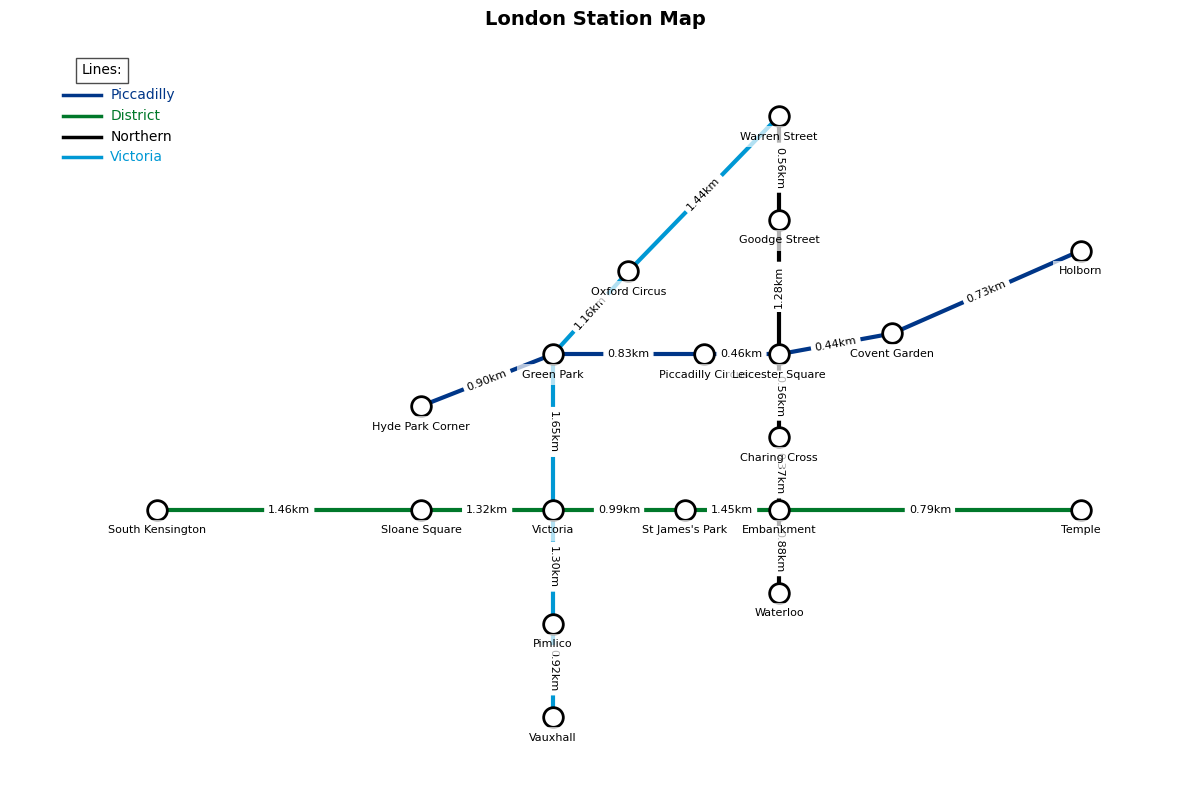

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import requests

# API key for accessing the GraphHopper routing service
api_key = '9f3cc7cc-ec4a-4215-b7cf-f899113a43d3'

# Function to get the distance between two places using the GraphHopper API
def get_distance(from_place, to_place, api_key):
    # Construct the API request URL
    url = f"https://graphhopper.com/api/1/route?point={from_place}&point={to_place}&vehicle=foot&locale=en&key={api_key}"
    try:
        # Send the GET request to the API
        response = requests.get(url)
        # Raise an exception if the request was unsuccessful
        response.raise_for_status()
        # Parse the JSON response
        data = response.json()
        # Check if the response contains path data
        if 'paths' in data and len(data['paths']) > 0:
            # Extract the distance from the response and convert it to kilometers
            distance = data['paths'][0]['distance'] / 1000
            return round(distance, 2)
    except requests.exceptions.RequestException as e:
        # Print an error message if the request failed
        print(f"Request error: {e}")
    except KeyError:
        # Print an error message if the response format was unexpected
        print(f"Unexpected API response format: {response.json()}")
    return None

# Dictionary of station names and their coordinates (latitude, longitude)
stations = {
    'Hyde Park Corner': (51.50302149128801, -0.15235824006243975),
    'Green Park': (51.5070061280002, -0.14287307418199865),
    'Piccadilly Circus': (51.510121269538445, -0.1341883950738745),
    'Leicester Square': (51.51145856943495, -0.1281549563384886),
    'Covent Garden': (51.5129893884849, -0.12416984745824243),
    'Holborn': (51.517400079753095, -0.12008183592996242),
    'Victoria': (51.49565603908696, -0.14369343533057796),
    'Oxford Circus': (51.51529005382135, -0.141821771044848),
    'Warren Street': (51.524685723960786, -0.13815225863941286),
    'Pimlico': (51.48925301147073, -0.1333526131260753),
    'Charing Cross': (51.50847507426735, -0.1258796131491678),
    'Vauxhall': (51.486292231695955, -0.1235812622912972),
    'Goodge Street': (51.52061563812707, -0.13449592872462537),
    'Embankment': (51.50725039869003, -0.12225296848834055),
    'Temple': (51.51098118147287, -0.11424545368995356),
    'Waterloo': (51.503239001418635, -0.11221050001859059),
    'St James\'s Park': (51.4994180528057, -0.13383831958088013),
    'Sloane Square': (51.49235415162821, -0.15648264114864502),
    'South Kensington': (51.49415207725121, -0.1740181508962205),
}

# List of connections between stations
connections = [
    ('Hyde Park Corner', 'Green Park'),
    ('Green Park', 'Piccadilly Circus'),
    ('Green Park', 'Victoria'),
    ('Green Park', 'Oxford Circus'),
    ('Oxford Circus', 'Warren Street'),
    ('Piccadilly Circus', 'Leicester Square'),
    ('Leicester Square', 'Covent Garden'),
    ('Leicester Square', 'Charing Cross'),
    ('Goodge Street', 'Warren Street'),
    ('Goodge Street', 'Leicester Square'),
    ('Covent Garden', 'Holborn'),
    ('Victoria', 'Pimlico'),
    ('Pimlico', 'Vauxhall'),
    ('Charing Cross', 'Embankment'),
    ('Embankment', 'Waterloo'),
    ('Embankment', 'Temple'),
    ('Embankment', 'St James\'s Park'),
    ('St James\'s Park', 'Victoria'),  
    ('Victoria', 'Sloane Square'),    
    ('Sloane Square', 'South Kensington'),
    ('Victoria', 'South Kensington'),
]

# Dictionary to store distances between connected stations
distances = {}
for u, v in connections:
    # Get the distance between each pair of connected stations
    distance = get_distance(f"{stations[u][0]},{stations[u][1]}", f"{stations[v][0]},{stations[v][1]}", api_key)
    if distance is not None:
        # Store the distance in the dictionary
        distances[(u, v)] = distance
    else:
        # Print an error message if the distance could not be fetched
        print(f"Failed to fetch distance for: {u} -> {v}")

# Function to create and plot the graph of the stations and connections
def create_graph():
    # Create an empty graph
    G = nx.Graph()
    
    # Define the layout of the stations for plotting
    stations_layout = {
        'Hyde Park Corner': (-70, -50),
        'Green Park': (0, 0),
        'Piccadilly Circus': (80, 0),
        'Leicester Square': (120, 0),
        'Charing Cross': (120, -80),
        'Covent Garden': (180, 20),
        'Holborn': (280 ,100),
        'Victoria': (0, -150),
        'Oxford Circus': ( 40 ,80),
        'Warren Street': (120, 230),
        'Pimlico': (0, -260),
        'Vauxhall': (0, -350),
        'Goodge Street': (120, 130),
        'Embankment': (120, -150),
        'Temple': (280, -150),
        'Waterloo': (120, -230),
        'St James\'s Park': (70, -150),
        'Sloane Square': (-70, -150),
        'South Kensington': (-210, -150)
    }
    
    # Define the connections for each line
    line_connections = {
        'Piccadilly': [
            ('Hyde Park Corner', 'Green Park'),
            ('Green Park', 'Piccadilly Circus'),
            ('Piccadilly Circus', 'Leicester Square'),
            ('Leicester Square', 'Covent Garden'),
            ('Covent Garden', 'Holborn')
        ],
        'District': [
            ('South Kensington', 'Sloane Square'),
            ('Sloane Square', 'Victoria'),
            ('Victoria', 'St James\'s Park'),
            ('St James\'s Park', 'Embankment'),
            ('Embankment', 'Temple')
        ],
        'Northern': [
            ('Warren Street', 'Goodge Street'),
            ('Goodge Street', 'Leicester Square'),
            ('Leicester Square', 'Charing Cross'),
            ('Charing Cross', 'Embankment'),
            ('Embankment', 'Waterloo')
        ],
        'Victoria': [
            ('Warren Street', 'Oxford Circus'),
            ('Oxford Circus', 'Green Park'),
            ('Green Park', 'Victoria'),
            ('Victoria', 'Pimlico'),
            ('Pimlico', 'Vauxhall')
        ]
    }
    
    # Define the colors for each line
    line_colors = {
        'Piccadilly': '#003688',
        'District': '#00782A',
        'Northern': '#000000',
        'Victoria': '#0098D4'
    }
    
    # Create a plot with a specified size
    plt.figure(figsize=(12, 8))
    
    # Add nodes (stations) to the graph with their positions
    for station in stations_layout:
        G.add_node(station, pos=stations_layout[station])
    
    # Get the positions of the nodes
    pos = nx.get_node_attributes(G, 'pos')
    
    # Add edges (connections) to the graph for each line
    for line_name, connections in line_connections.items():
        edge_list = []
        for u, v in connections:
            G.add_edge(u, v)
            edge_list.append((u, v))
            
        # Draw the edges of the graph with the specified color for each line
        nx.draw_networkx_edges(G, pos,
                             edgelist=edge_list,
                             edge_color=line_colors[line_name],
                             width=3)
    
    # Draw the nodes of the graph
    nx.draw_networkx_nodes(G, pos,
                          node_color='white',
                          node_size=200,
                          edgecolors='black',
                          linewidths=2)
    
    # Add labels to the nodes
    for station, (x, y) in stations_layout.items():
        plt.text(
            x, y - 20, station,
            ha='center', va='center',
            fontsize=8,
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)
        )
    
    # Create edge labels (distances)
    edge_labels = {}
    for (u, v) in G.edges():
        if (u, v) in distances:
            edge_labels[(u, v)] = f"{distances[(u, v)]:.2f}km"
        elif (v, u) in distances:
            edge_labels[(u, v)] = f"{distances[(v, u)]:.2f}km"
        else:
            edge_labels[(u, v)] = "N/A"
    
    # Draw the edge labels on the graph
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
    
    # Add a legend to the plot
    legend_x = -250
    legend_y = 250
    plt.text(legend_x, legend_y + 20, "Lines:", fontsize=10,
             bbox=dict(facecolor="white", edgecolor="black", alpha=0.7))
    
    for i, (line_name, color) in enumerate(line_colors.items()):
        plt.plot([legend_x - 10, legend_x + 10],
                [legend_y - i * 20, legend_y - i * 20],
                color=color, linewidth=2.5)
        plt.text(legend_x + 15, legend_y - i * 20, line_name,
                color=color, fontsize=10, va='center')
    
    # Set the title of the plot
    plt.title('London Station Map', pad=20, fontsize=14, fontweight='bold')
    # Turn off the axis
    plt.axis('off')
    
    return plt

# Create and display the plot
plt = create_graph()
plt.tight_layout()
plt.show()

In [3]:
import numpy as np

# Extract the distance values from the distances dictionary
distance_values = list(distances.values())

# Calculate the total length of all distances
total_length = sum(distance_values)

# Calculate the average distance
average_distance = np.mean(distance_values)

# Calculate the standard deviation of the distances
std_deviation = np.std(distance_values)

# Print the total length of all distances
print("Total Length:", total_length)
# Print the average distance
print("Average Distance:", average_distance)
# Print the standard deviation of the distances
print("Standard Deviation:", std_deviation)

Total Length: 22.19
Average Distance: 1.0566666666666666
Standard Deviation: 0.5216853031814828
